<a href="https://colab.research.google.com/github/Ishu2412/Driver_Monitoring_System/blob/main/driver_monitoring_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 13.5 MB/s eta 0:00:00


In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import yaml
import shutil
import numpy as np
import pandas as pd

import supervision as sv
from ultralytics import YOLO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install kaggle

In [5]:
!mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [8]:
! kaggle datasets download habbas11/dms-driver-monitoring-system

Dataset URL: https://www.kaggle.com/datasets/habbas11/dms-driver-monitoring-system
License(s): apache-2.0
 89% 217M/243M [00:02<00:00, 90.3MB/s]
100% 243M/243M [00:02<00:00, 119MB/s] 


In [9]:
! unzip dms-driver-monitoring-system.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/images58_jpg.rf.9e328475de526f8b11b95a5132dd58d1.txt  
  inflating: train/labels/images59_jpg.rf.401c7101eba031917d07b7de927ca0c0.txt  
  inflating: train/labels/images5_jpg.rf.02590f3da55afcb5a5454693506197d9.txt  
  inflating: train/labels/images5_jpg.rf.17d6533db71fdadd8cec4586680e7991.txt  
  inflating: train/labels/images5_jpg.rf.7dd759b47903ba79fb9702ea228db711.txt  
  inflating: train/labels/images5_jpg.rf.c9be8f985c91c76a9a508d9c3e74a817.txt  
  inflating: train/labels/images5_jpg.rf.e1be0dd1d49908f4becf6c9264dadf42.txt  
  inflating: train/labels/images60_jpg.rf.4b260b5e02e5d34f23faaf9ac3af45e8.txt  
  inflating: train/labels/images60_jpg.rf.bbd10f976ebcc51f9e9c6b8af6f9e5d5.txt  
  inflating: train/labels/images61_jpg.rf.2a067e12ce90dfd8ea7f11f022853dca.txt  
  inflating: train/labels/images61_jpg.rf.83f8d0122646f248962305690297c5a4.txt  
  inflating: train/labels/images61_jpg.rf.a791d5798966913572027

In [10]:
test_labels = "/content/test/labels"
train_labels = "/content/train/labels"
val_labels = "/content/valid/labels"

In [11]:
data = {"labels":[], "split_type":[]}

for links, split_type in zip([train_labels, test_labels, val_labels], ["train", "test", "val"]):
    for labels in os.listdir(links):
        path = os.path.join(links, labels)
        data["labels"].append(path)
        data["split_type"].append(split_type)

In [12]:
df = pd.DataFrame(data)

print(df.shape)

df.head()

(9884, 2)


,labels,split_type
0,/content/train/labels/_-50-_mp4-18_jpg.rf.4813...,train
1,/content/train/labels/00582_jpg.rf.706eda51910...,train
2,/content/train/labels/_-47-_mp4-2_jpg.rf.886c6...,train
3,/content/train/labels/CHANNEL_04_2022081216153...,train
4,/content/train/labels/10069_jpeg.rf.0a75009362...,train


In [13]:
df.describe().T

,count,unique,top,freq
labels,9884,9884,/content/train/labels/_-50-_mp4-18_jpg.rf.4813...,1
split_type,9884,3,train,5957


In [14]:
for index, labels in enumerate(df["labels"]):
    if len(np.loadtxt(labels)) != 0:
        df.loc[index, "is_annotated"] = True
    else:
        df.loc[index, "is_annotated"] = False

In [15]:
df["is_annotated"].value_counts()

,count
is_annotated,
True,9884


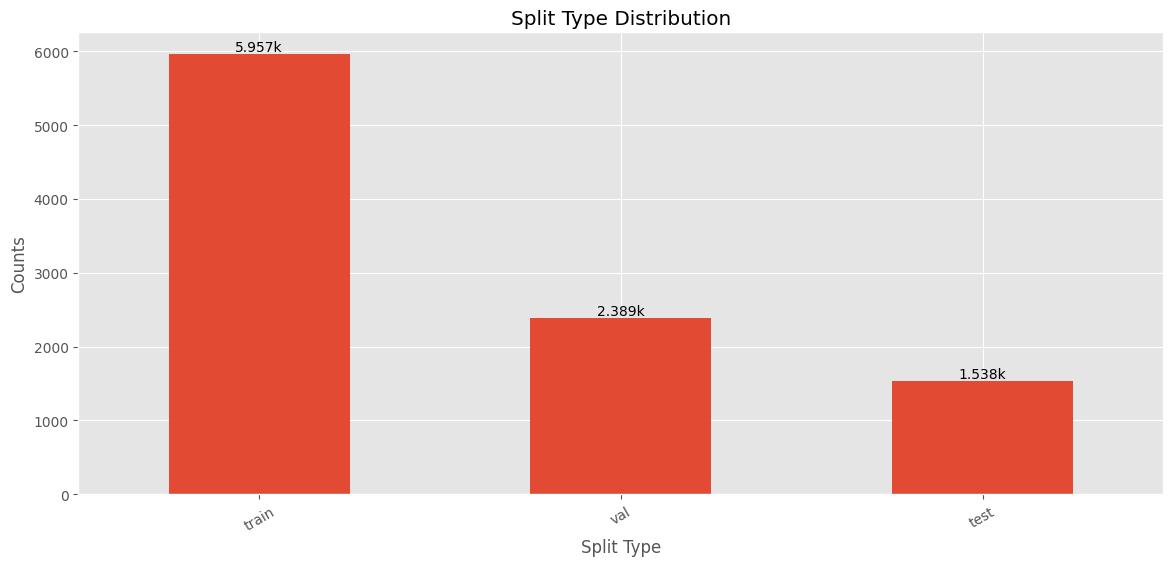

In [16]:
plt.style.use("ggplot")

plt.figure(figsize=(14, 6))

barplot = df["split_type"].value_counts().plot(kind="bar")

for p in barplot.patches:
    h = p.get_height()
    barplot.text(p.get_x()+(p.get_width()/2), h, f"{h/1000:}k", va="bottom", ha="center")

barplot.set_title("Split Type Distribution")
barplot.set_xlabel("Split Type")
barplot.set_ylabel("Counts")
barplot.set_xticklabels(labels=barplot.get_xticklabels(), rotation=30)
plt.show()

In [18]:
model = YOLO(model='yolov8n.pt')

model.train(data="/content/data.yaml", epochs=20)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.3MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 5957 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5957/5957 [00:03<00:00, 1671.55it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 2389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2389/2389 [00:02<00:00, 1190.95it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.28G      1.463      2.121       1.27         31        640: 100%|██████████| 373/373 [02:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:19<00:00,  3.79it/s]


                   all       2389       5773      0.671       0.62      0.677      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.23G      1.289      1.236      1.159         34        640: 100%|██████████| 373/373 [01:58<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.23it/s]


                   all       2389       5773      0.774       0.66      0.737      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.25G      1.259      1.097      1.154         30        640: 100%|██████████| 373/373 [01:57<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.19it/s]

                   all       2389       5773      0.728      0.707      0.753      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.23G       1.22     0.9796      1.131         17        640: 100%|██████████| 373/373 [01:57<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.37it/s]


                   all       2389       5773      0.775      0.684      0.782      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.25G       1.17     0.8963      1.103         14        640: 100%|██████████| 373/373 [01:55<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


                   all       2389       5773      0.736      0.712      0.758      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.24G      1.143      0.867      1.091         23        640: 100%|██████████| 373/373 [01:57<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:18<00:00,  4.03it/s]


                   all       2389       5773      0.818      0.769      0.823      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.24G      1.109     0.8249      1.079         25        640: 100%|██████████| 373/373 [01:57<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.27it/s]


                   all       2389       5773      0.833      0.766      0.844      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.23G      1.089     0.7956      1.069         24        640: 100%|██████████| 373/373 [01:56<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.30it/s]


                   all       2389       5773      0.821      0.772      0.831      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.24G      1.072     0.7718      1.059         16        640: 100%|██████████| 373/373 [01:56<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.18it/s]

                   all       2389       5773      0.813      0.796      0.847      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.24G      1.037     0.7413      1.044         32        640: 100%|██████████| 373/373 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.21it/s]

                   all       2389       5773      0.833      0.809      0.865      0.571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.22G      1.002     0.6692       1.05          9        640: 100%|██████████| 373/373 [01:53<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.26it/s]

                   all       2389       5773      0.847      0.774      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.2G     0.9803      0.636      1.039         10        640: 100%|██████████| 373/373 [01:51<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:18<00:00,  4.13it/s]

                   all       2389       5773      0.843      0.832      0.888      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.22G     0.9674     0.6162      1.029         14        640: 100%|██████████| 373/373 [01:53<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.34it/s]


                   all       2389       5773      0.818       0.84      0.881      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.22G     0.9389     0.5956      1.022         15        640: 100%|██████████| 373/373 [01:52<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.34it/s]

                   all       2389       5773      0.849      0.827      0.888      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.22G     0.9201     0.5712      1.013         11        640: 100%|██████████| 373/373 [01:54<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.28it/s]

                   all       2389       5773      0.854      0.827      0.891      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.21G     0.9044     0.5532      1.007         16        640: 100%|██████████| 373/373 [01:53<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:18<00:00,  4.14it/s]

                   all       2389       5773      0.864      0.832      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.22G     0.8821     0.5355     0.9936         12        640: 100%|██████████| 373/373 [01:51<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.23it/s]

                   all       2389       5773       0.85       0.84      0.899      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.21G     0.8691     0.5195      0.987         14        640: 100%|██████████| 373/373 [01:52<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.32it/s]

                   all       2389       5773       0.87      0.833      0.904      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.21G     0.8446     0.5007     0.9774         13        640: 100%|██████████| 373/373 [01:53<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:17<00:00,  4.40it/s]

                   all       2389       5773      0.855      0.861      0.909      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.2G     0.8312       0.49     0.9744         12        640: 100%|██████████| 373/373 [02:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:18<00:00,  4.15it/s]

                   all       2389       5773      0.861      0.864      0.912      0.648



20 epochs completed in 0.752 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:20<00:00,  3.63it/s]


                   all       2389       5773      0.862      0.864      0.913      0.648
              Open Eye       1485       2710      0.909      0.958      0.978      0.784
            Closed Eye        358        530      0.827      0.766      0.864      0.662
             Cigarette        430        453        0.8      0.753      0.821      0.454
                 Phone        504        588      0.892       0.94      0.966      0.692
              Seatbelt       1461       1492      0.885      0.903      0.934      0.647
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be24a997250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [22]:
model.save("/content/drive/MyDrive/kaggle/best.pt")